<h1>Project Ice Classification in the Groenland</h1>

In [2]:
import pandas as pd

<h2>Import Data</h2>

In [3]:
#Load the data
tab = pd.read_csv('data_Features.csv')
tabY = pd.read_csv('data_Targets.csv')

<h2>Exploratory Data Analysis</h2>

In [4]:
tab.head()

time        t2m       u10       v10       SST        SIC    r1_MAR  \
0  2013-01-01 -21.926931 -0.973994  3.149094 -1.690511  90.745710  0.034537   
1  2013-01-02 -23.696195 -6.502908  2.494894 -1.690511  88.502980  0.034527   
2  2013-01-03 -25.644027 -3.557411  1.025486 -1.689860  88.734091  0.034523   
3  2013-01-04 -23.566887 -1.888075 -3.486122 -1.690511  89.149576  0.034509   
4  2013-01-05 -22.897768 -2.748844 -3.491206 -1.689860  91.613955  0.034492   

     r2_MAR  r3_MAR  r4_MAR  r5_MAR  
0  0.033345     0.0     0.0     0.0  
1  0.033326     0.0     0.0     0.0  
2  0.033321     0.0     0.0     0.0  
3  0.033306     0.0     0.0     0.0  
4  0.033290     0.0     0.0     0.0

In [5]:
# 2 meter below sea temperature (t2m)
# Sea-surface temperature (SST)
# wind speed (u10, v10)
# Sea Ice Concentration information (SIC)
# Groenland liquid water discharge simulated by Region Climate Models for 5 regions 
tab.describe()

t2m          u10          v10          SST          SIC  \
count  2556.000000  2556.000000  2556.000000  2556.000000  2556.000000   
mean    -10.190040     0.139648     0.626351    -0.858922    73.267808   
std      10.340583     5.013640     3.955417     1.446165    29.250724   
min     -32.019122   -13.846656   -12.316128    -1.692462     0.000000   
25%     -19.877500    -3.610168    -2.079422    -1.689860    70.000000   
50%      -9.596479    -0.187084     0.912780    -1.689860    84.601769   
75%       0.167824     3.807440     3.483397    -0.297573    90.362319   
max       7.840619    14.640913    12.811255     6.054536    99.500682   

            r1_MAR       r2_MAR       r3_MAR       r4_MAR       r5_MAR  
count  2556.000000  2556.000000  2556.000000  2556.000000  2556.000000  
mean     18.789275    11.522362     1.328740     4.382248     5.191286  
std      47.703600    27.942124     3.393452    12.971518    13.406972  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.123798     0.121437     0.000000     0.000000     0.000000  
50%       0.481870     0.481870     0.000000     0.000000     0.000000  
75%       4.080174     3.961181     0.004413     0.010148     0.000150  
max     479.722174   281.673389    23.241791   115.876574    88.054318

In [6]:
tabY.describe()

Y1           Y3           Y4           Y5
count  2556.000000  2556.000000  2556.000000  2556.000000
mean      3.525430     0.715571     3.955399     0.586072
std      18.977537     4.785996    25.622969     9.534530
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000
max     433.000000   139.000000   624.000000   284.000000

<h3>Missing values</h3>

In [7]:
tab.isna().sum()

time      0
t2m       0
u10       0
v10       0
SST       0
SIC       0
r1_MAR    0
r2_MAR    0
r3_MAR    0
r4_MAR    0
r5_MAR    0
dtype: int64

In [8]:
tabY.isna().sum()

Unnamed: 0    0
Y1            0
Y3            0
Y4            0
Y5            0
dtype: int64

<h3>Target Data Distribution<h3>

In [9]:
target=tabY["Y1"]
target.value_counts().loc[target.value_counts()>1].head(10)

Y1
0     2262
1       62
2       22
6       13
5       11
4       10
3        9
10       9
34       6
16       6
Name: count, dtype: int64

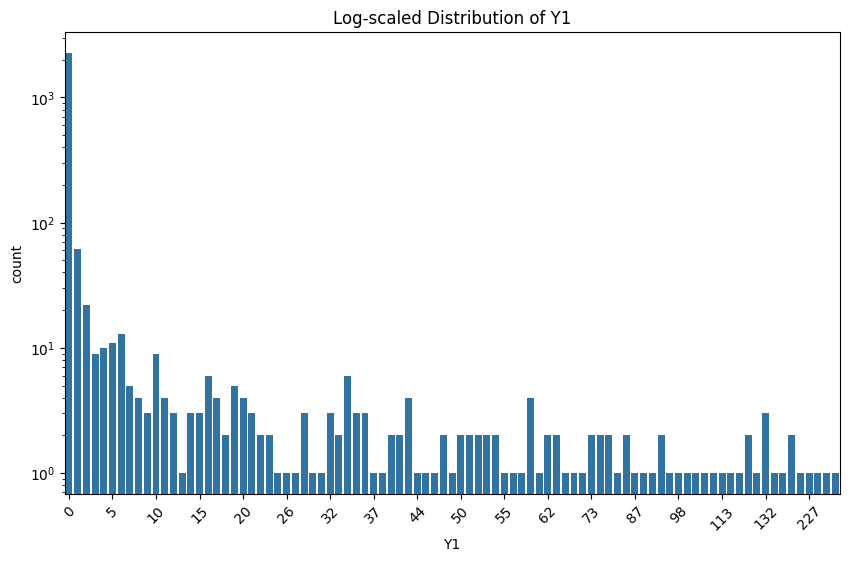

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Log-scaled bar plot with selective x-axis ticks and rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Y1', data=tabY)
plt.yscale('log')
plt.title('Log-scaled Distribution of Y1')

# Only show every nth label (e.g., every 5th label)
xticks = plt.gca().get_xticks()
plt.gca().set_xticks(xticks[::5])  # Adjust the step size as needed
plt.xticks(rotation=45)  # Rotate for readability
plt.show()


<h3>Correlation Matrix</h3>

In [11]:
# Convert 'time' column to datetime format
tab['time'] = pd.to_datetime(tab['time'])

# Extract year, month, and day as new columns
tab['year'] = tab['time'].dt.year
tab['month'] = tab['time'].dt.month
tab['day'] = tab['time'].dt.day

tab = tab.drop(columns=['time'])

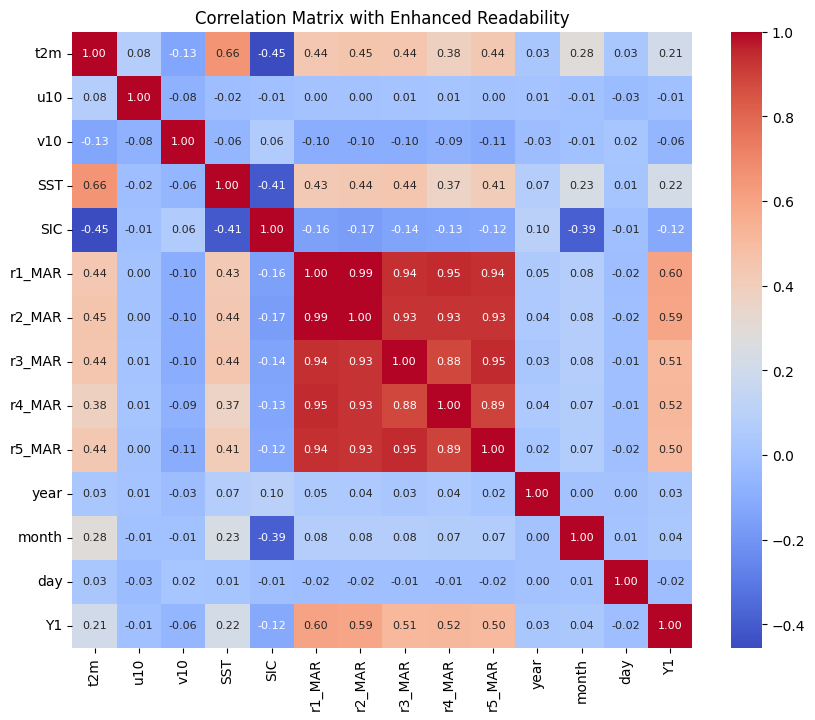

In [12]:
# Concatenate features and target for correlation analysis
combined_data = pd.concat([tab, tabY['Y1']], axis=1)
correlation_matrix = combined_data.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8})  # Reduce font size for annotations
plt.title('Correlation Matrix with Enhanced Readability')
plt.show()

<h3>Input Data Distribution</h3>

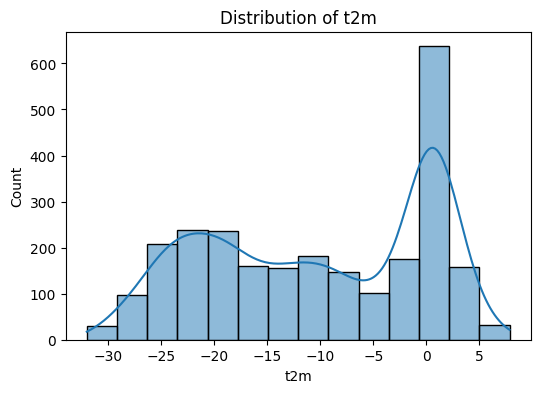

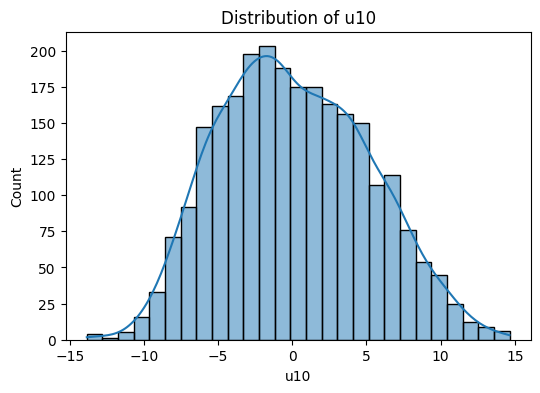

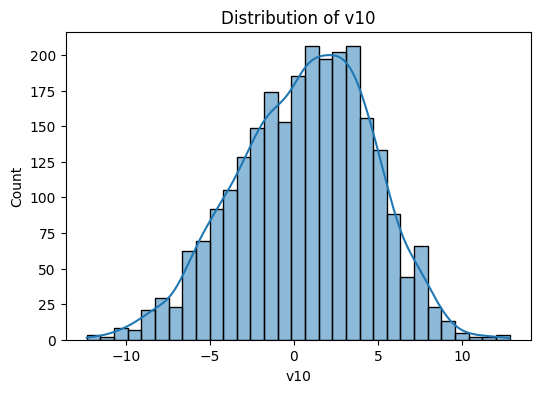

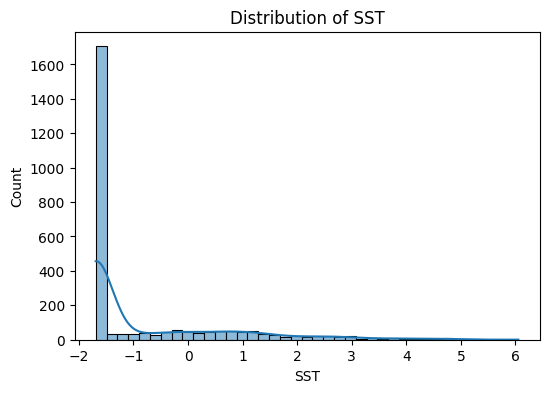

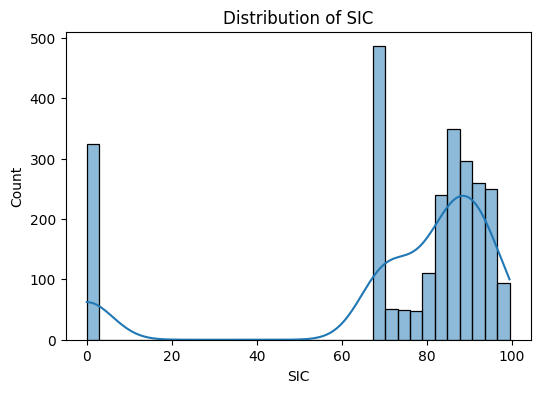

In [13]:
not_corr_features=["t2m","u10","v10","SST","SIC"]

# Plotting distributions for each feature that is not highlt correlated to Y1
for col in not_corr_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(tab[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

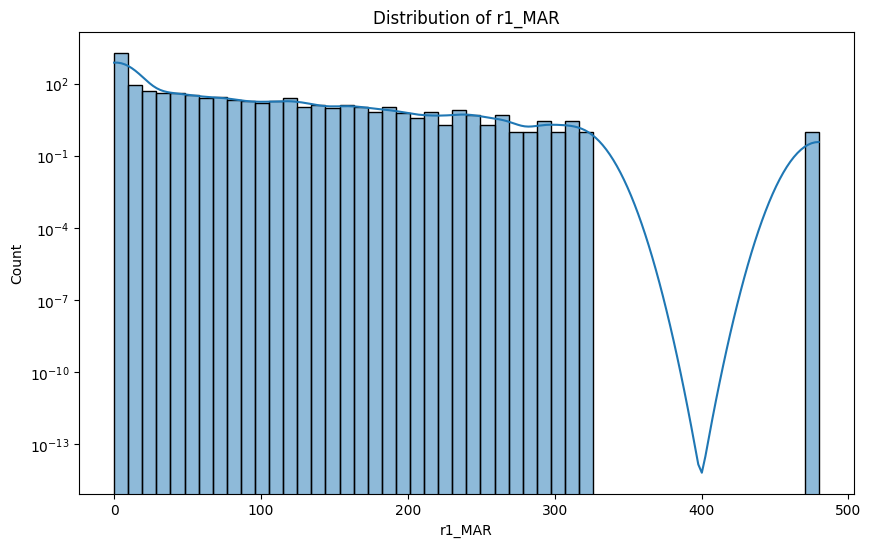

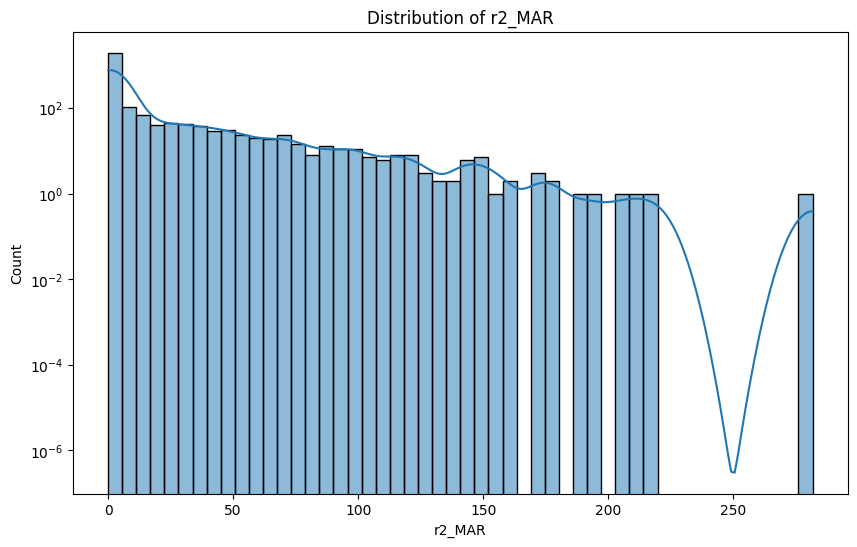

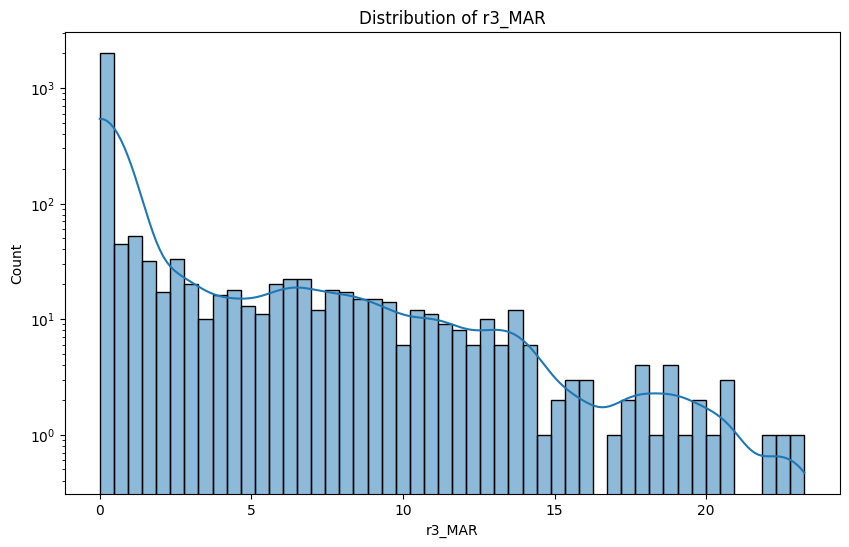

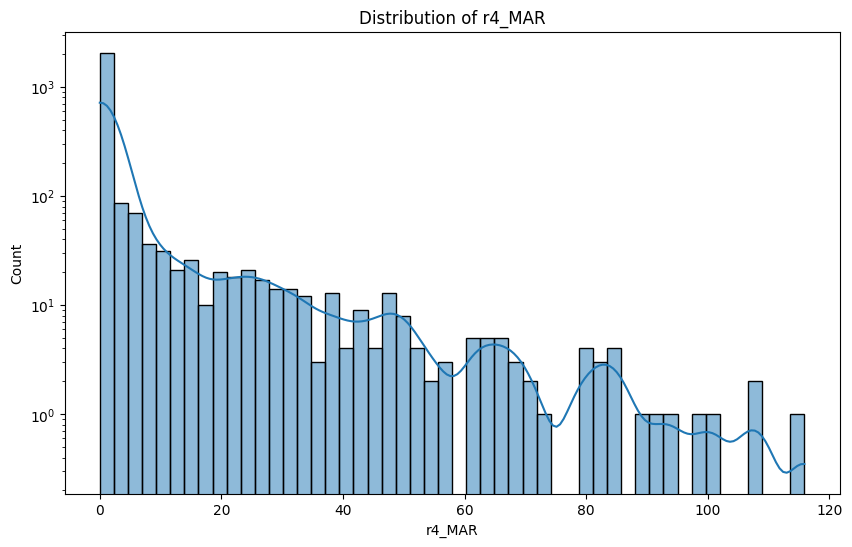

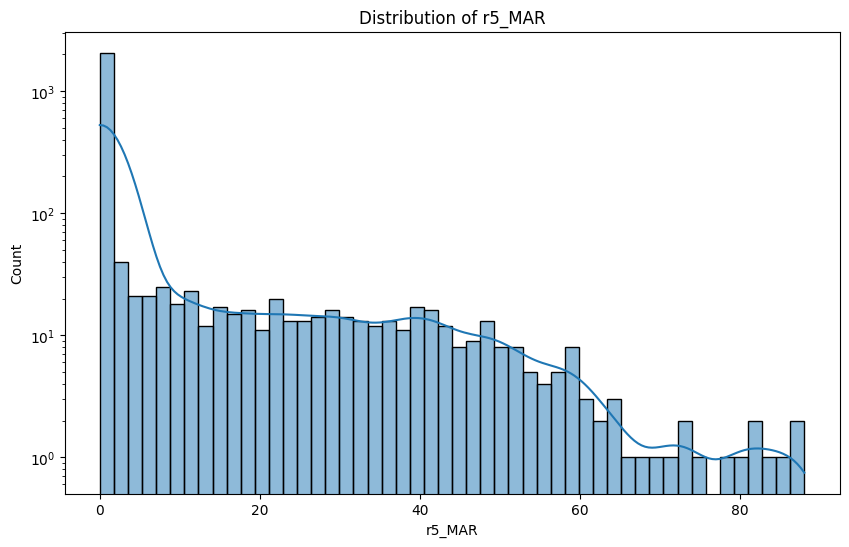

In [14]:
correlated_features=["r1_MAR","r2_MAR","r3_MAR","r4_MAR","r5_MAR"]
for col in correlated_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(tab[col], kde=True, bins=50)  # Try reducing the number of bins
    plt.yscale('log')
    plt.title(f'Distribution of {col}')
    plt.show()

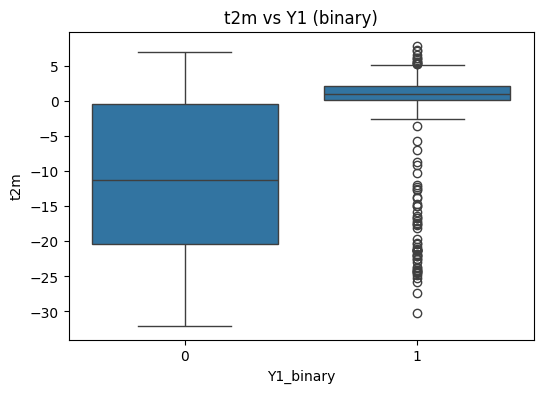

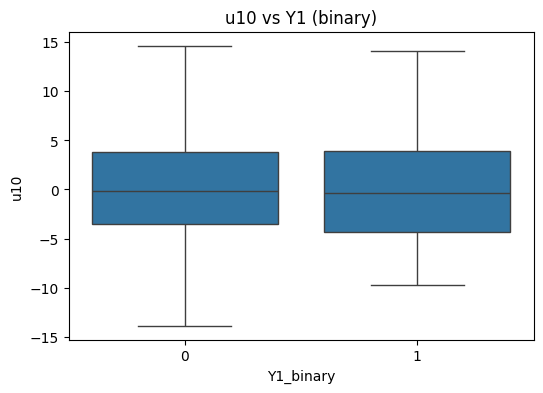

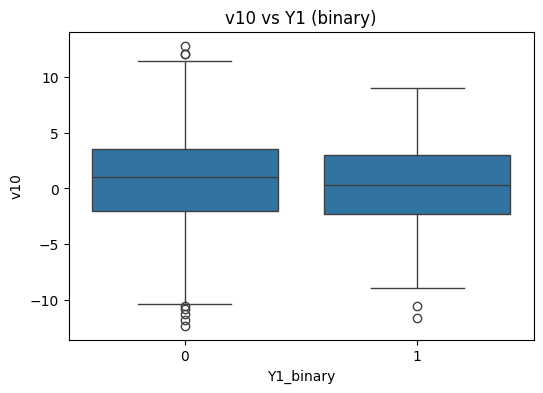

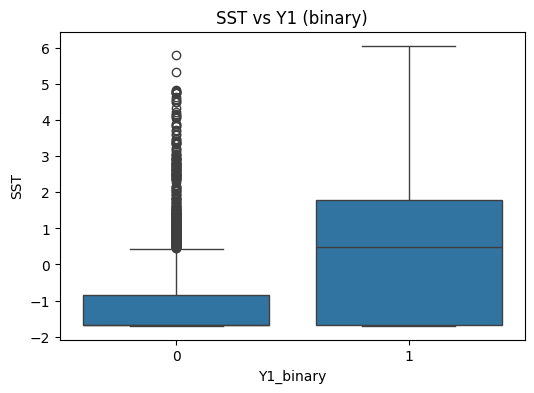

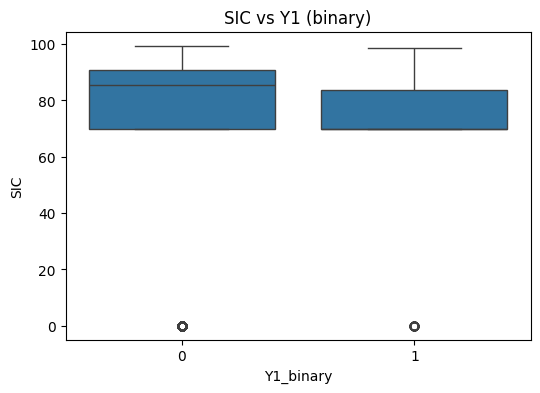

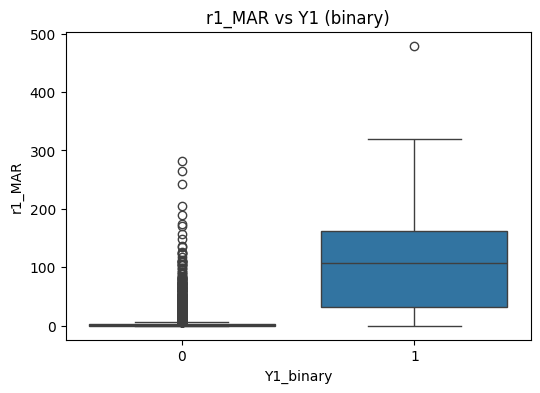

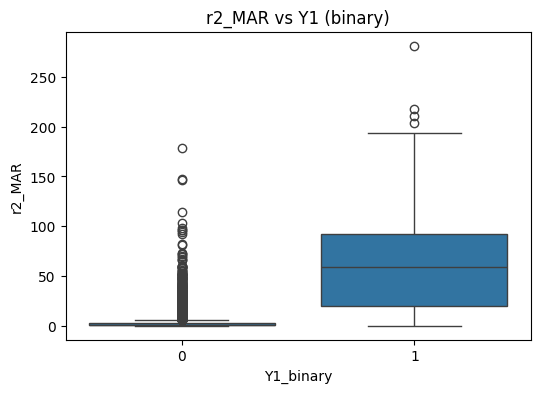

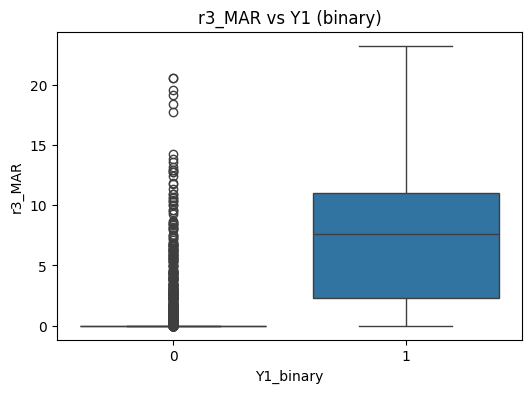

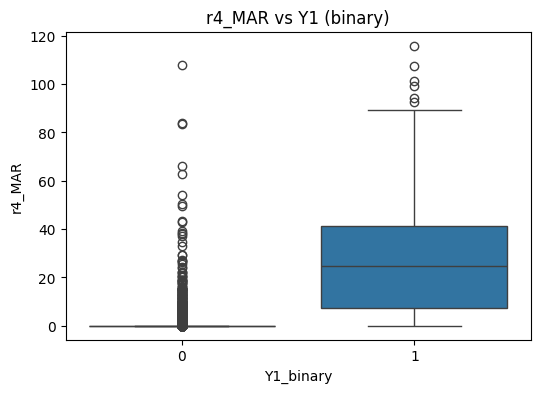

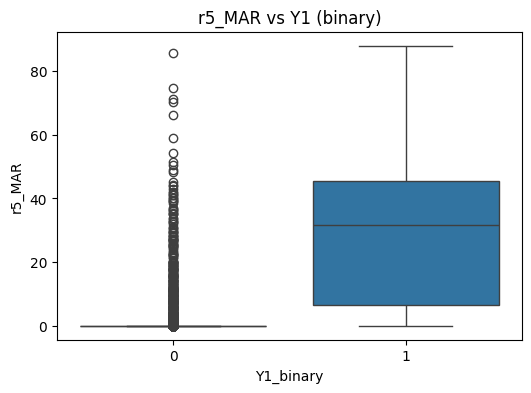

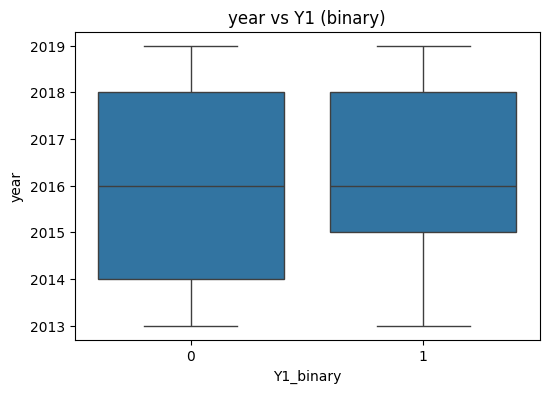

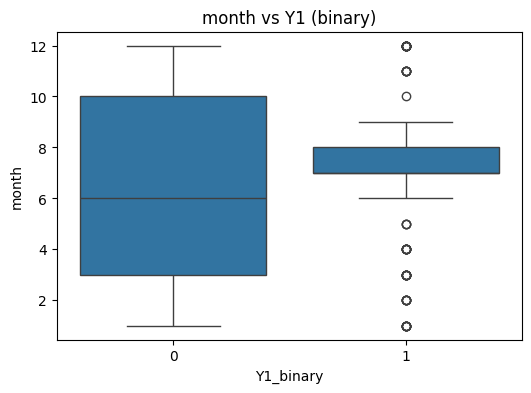

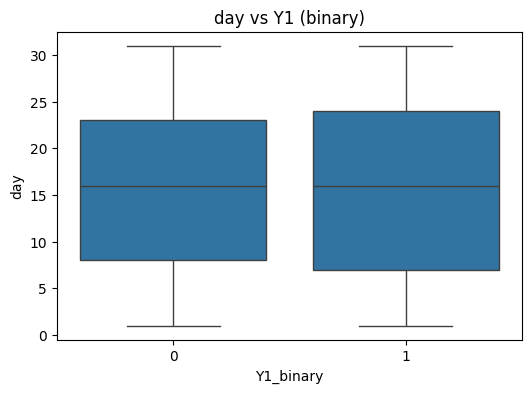

In [16]:
# Box plots of features grouped by binary Y1 (once you define a threshold)
tabY['Y1_binary'] = (tabY['Y1'] > 0).astype(int)
for col in tab.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=tabY['Y1_binary'], y=tab[col])
    plt.title(f'{col} vs Y1 (binary)')
    plt.show()

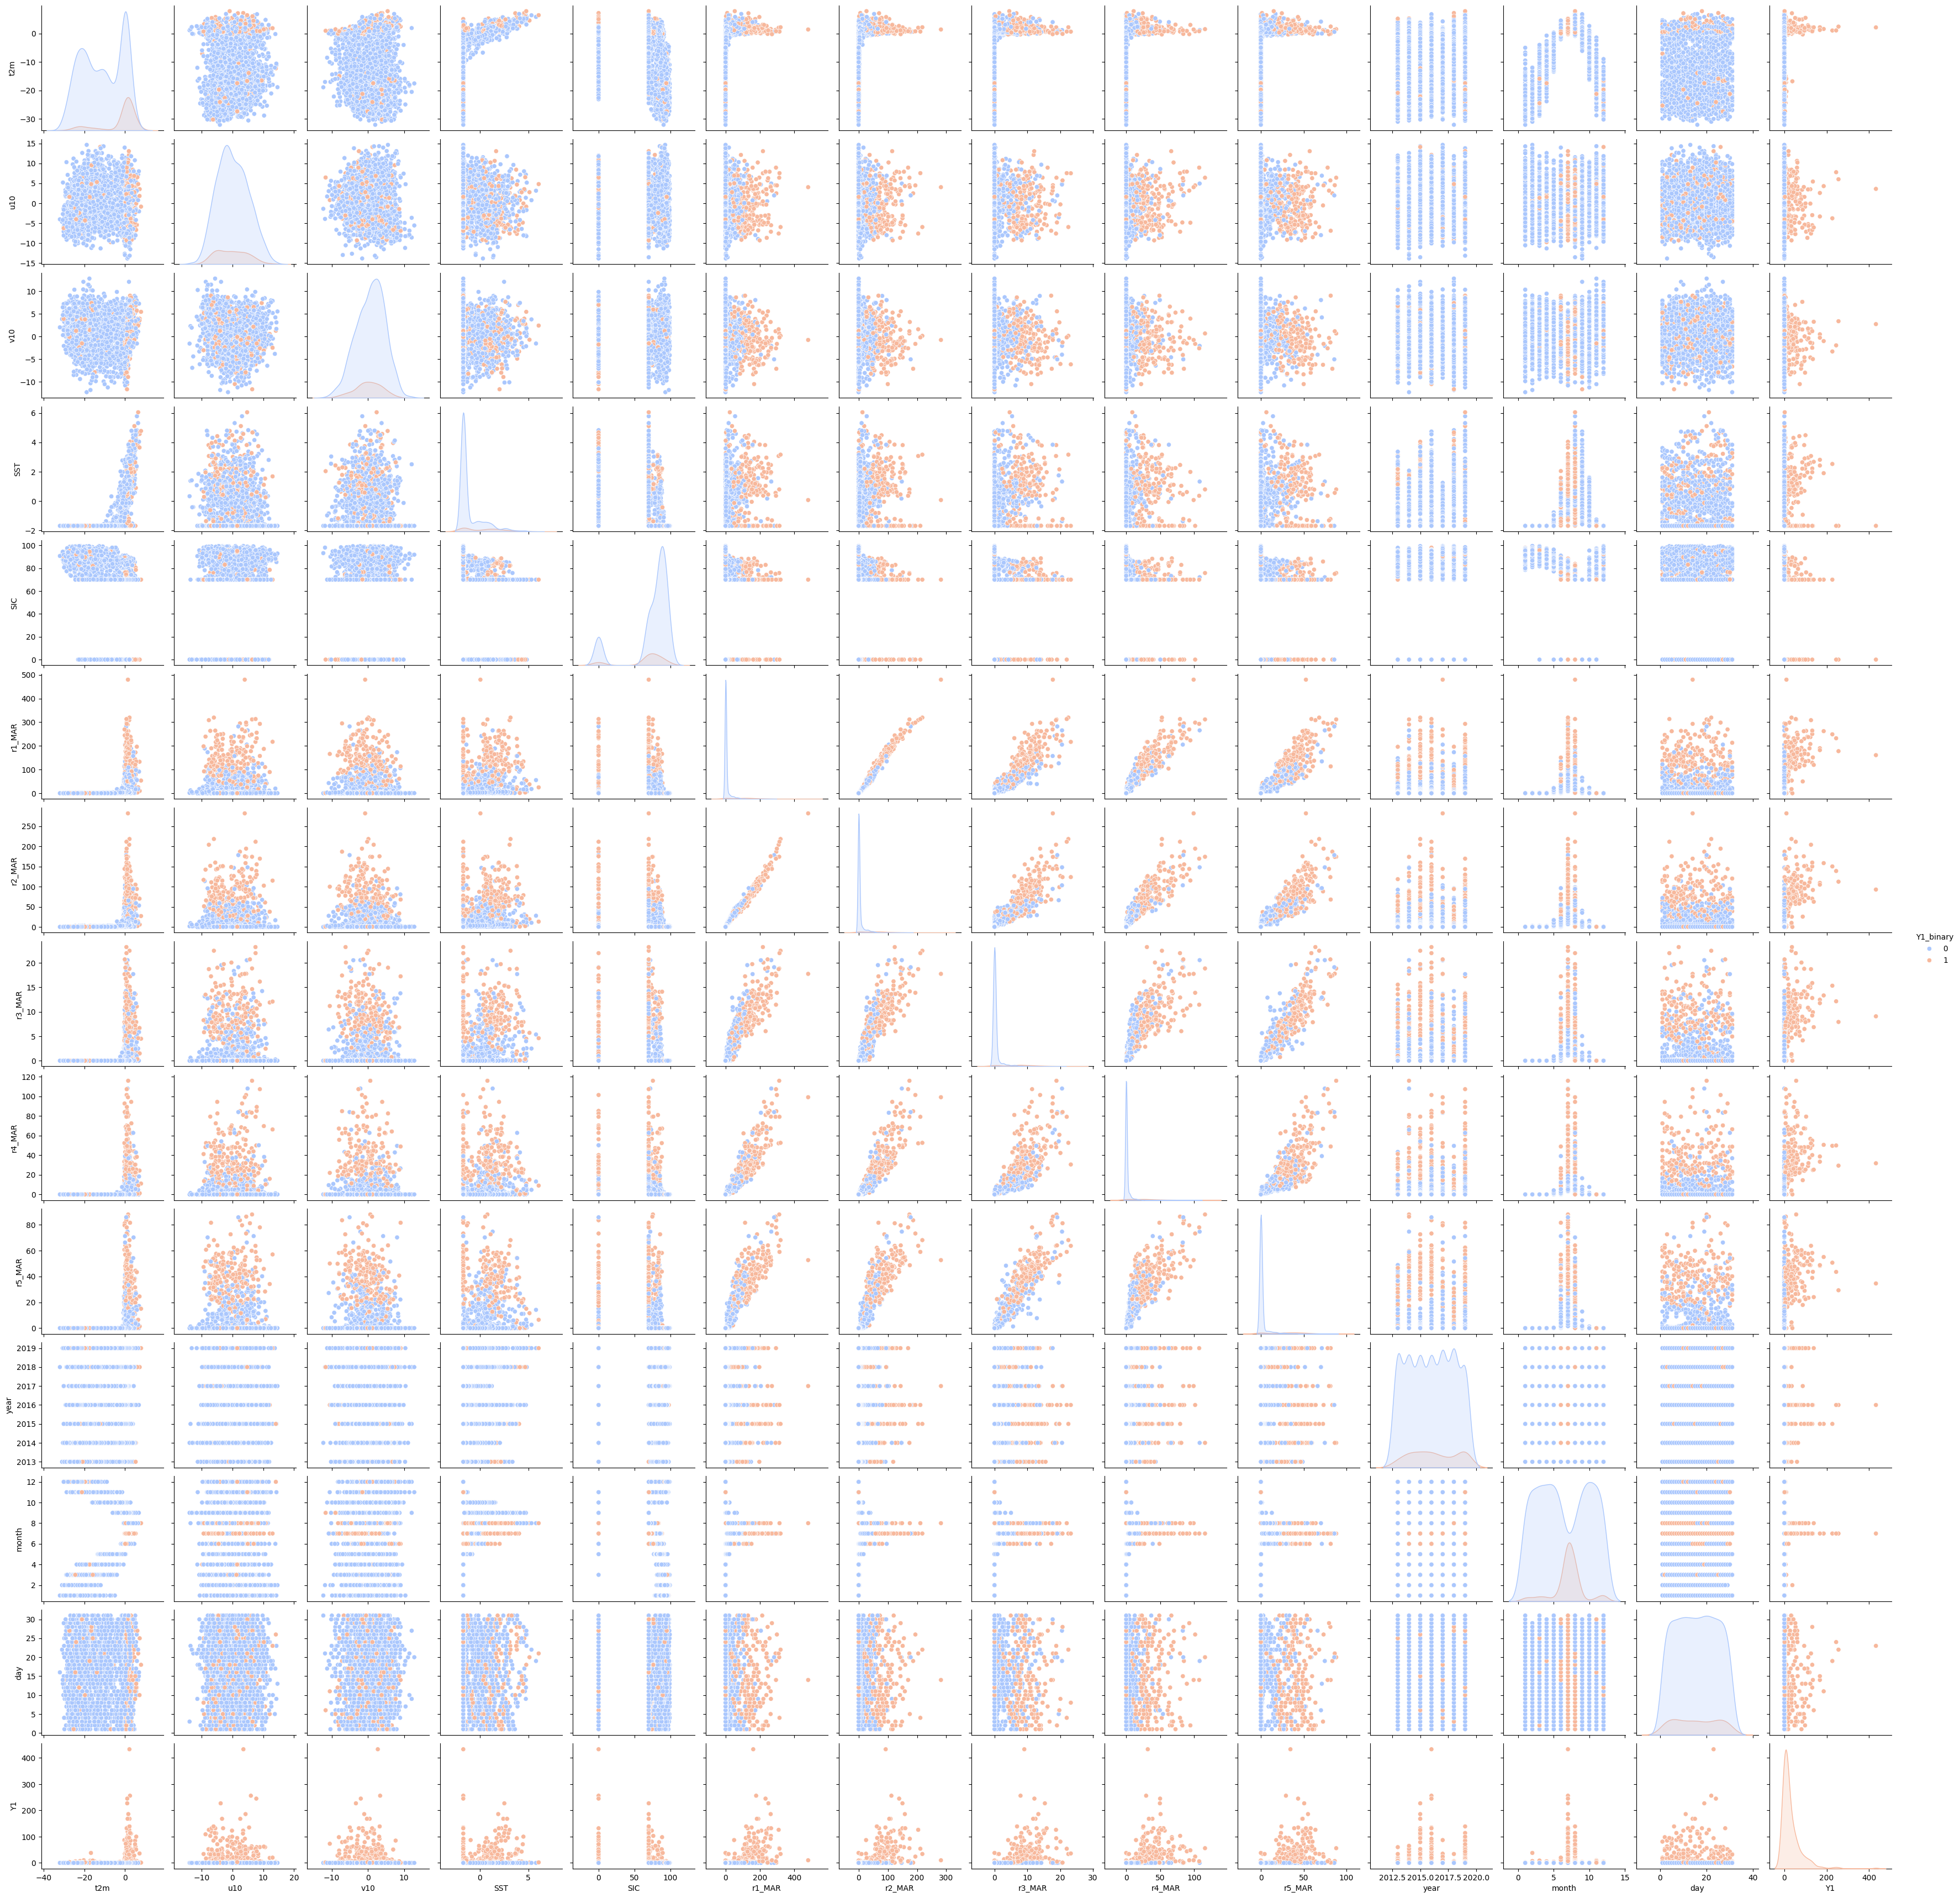

In [ ]:
# import seaborn as sns

# # pair plot
# combined_data['Y1_binary'] = (tabY['Y1'] > 0).astype(int)
# sns.pairplot(combined_data, hue='Y1_binary', palette='coolwarm')
# plt.show()

<h2>Random Forest</h2>

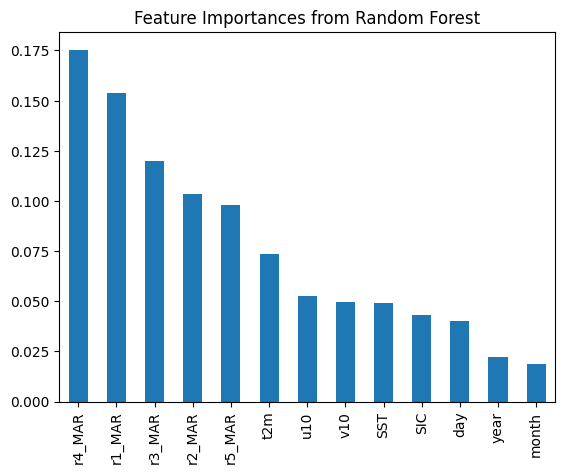

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Transform Y1 into binary based on threshold
Y_binary = (tabY['Y1'] > 0).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(tab, Y_binary, test_size=0.3, random_state=42)

# Fit Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=tab.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar', title='Feature Importances from Random Forest')
plt.show()

Precision: 0.828125
Recall: 0.6625
F1 Score: 0.7361111111111112
ROC AUC: 0.8920669577874818
AUPRC: 0.76094536063401

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       687
           1       0.83      0.66      0.74        80

    accuracy                           0.95       767
   macro avg       0.89      0.82      0.85       767
weighted avg       0.95      0.95      0.95       767



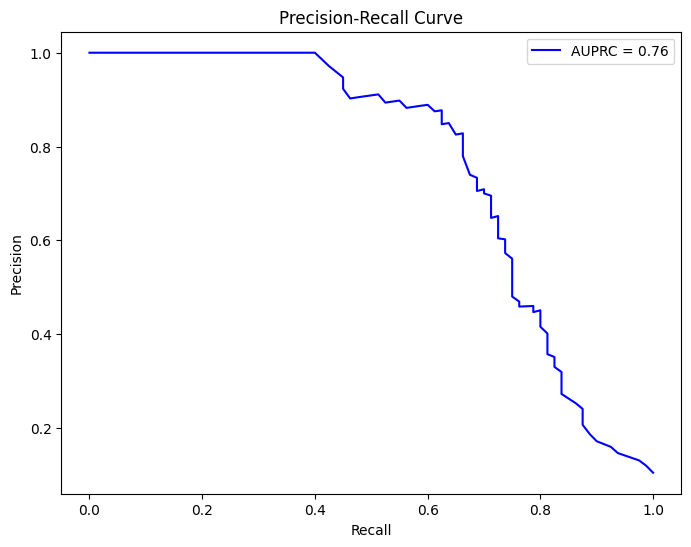

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.metrics import classification_report, roc_auc_score

# Predict on the test set
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1] 

# Evaluate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)  # ROC AUC for evaluating classification performance

# Precision-Recall Curve and AUPRC (Area Under the Precision-Recall Curve)
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_proba)
auprc = auc(recall_vals, precision_vals)

# Print classification metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("AUPRC:", auprc)

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='b', label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()